<a href="https://colab.research.google.com/github/DeaWahsa/DeaWahsa/blob/main/Skripsi_Algoritma_Library_Firefly%26PSO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LOAD DAN PREPROCESSING DATA**

In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [249]:
# Mengganti path dengan direktori yang sesuai
path = '/content/drive/My Drive/Colab Notebooks/'

# Load data dari file CSV
df_dataTraining = pd.read_csv(path + 'kumpulan_data.csv', encoding="ISO-8859-1")

In [250]:
df_dataTraining

,Short Text,WBS Desc,Name of Vendor,PO Date,Delivery Date,Doc Date GR,Local Amount,Description Project,Jumlah Projek,Nilai Performansi KHS,Alker/Salker,Stok Material,Jumlah Team,Kerapihan,Duration (Days),Masalaku,nilai projek per LoP,Kategori Anggaran Jumlah Projek,Kategori Durasi Jumlah Projek
0,R7 MKS ANT PT2 NOV 2021(8 LOP),PT2 TREG VII,PT. TELKOM AKSES,2021-12-27,2022-02-24,2022-03-11,3582546.0,PT-2 8 LOP Periode November Area Witel Makassa...,8.0,kontrak harga satuan kurang memenuhi,alker lengkap,stok material tersedia,team lengkap,rapih,59,74,28660368.0,anggaran sesuai,pengerjaan cepat
1,R7 MKS BAL PT2 NOV 2021(8 LOP),PT2 TREG VII,PT. TELKOM AKSES,2021-12-27,2022-02-24,2022-03-11,16057014.0,PT-2 8 LOP Periode November Area Witel Makassa...,8.0,kontrak harga satuan kurang memenuhi,alker lengkap,stok material tersedia,team lengkap,rapih,59,74,128456112.0,anggaran sesuai,pengerjaan cepat
2,R7 MKS MAT PT2 NOV 2021(8 LOP),PT2 TREG VII,PT. TELKOM AKSES,2021-12-27,2022-02-24,2022-03-11,1955579.0,PT-2 8 LOP Periode November Area Witel Makassa...,8.0,kontrak harga satuan kurang memenuhi,alker lengkap,stok material tersedia,team lengkap,rapih,59,74,15644632.0,anggaran sesuai,pengerjaan cepat
3,R7 MKS PNK PT2 NOV 2021(8 LOP),PT2 TREG VII,PT. TELKOM AKSES,2021-12-27,2022-02-24,2022-03-11,24203409.0,PT-2 8 LOP Periode November Area Witel Makassa...,8.0,kontrak harga satuan kurang memenuhi,alker lengkap,stok material tersedia,team lengkap,rapih,59,74,193627272.0,anggaran sesuai,pengerjaan cepat
4,R7 MKS TKA PT2 NOV 2021(8 LOP),PT2 TREG VII,PT. TELKOM AKSES,2021-12-27,2022-02-24,2022-03-11,7735037.0,PT-2 8 LOP Periode November Area Witel Makassa...,8.0,kontrak harga satuan kurang memenuhi,alker lengkap,stok material tersedia,team lengkap,rapih,59,74,61880296.0,anggaran sesuai,pengerjaan cepat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6917,R7 PRE PRE PT2 LAUNDRY SELFIANI,LME & INST AP CONS TREG-7,PT. MAPPADECENG JAYA LESTARI (I),2022-12-28,2023-01-26,2022-12-30,2165478.0,Pengadaan Pekerjaan LastMile FO 16 LoP Area Wi...,16.0,kontrak harga satuan memenuhi,alker lengkap,stok material tersedia,team lengkap,tidak rapih,29,2,34647648.0,anggaran sesuai,pengerjaan cepat
6918,R7 PRE PRE PT2 QANIAH MOTOR,LME & INST AP CONS TREG-7,PT. MAPPADECENG JAYA LESTARI (I),2022-12-28,2023-01-26,2022-12-30,2165478.0,Pengadaan Pekerjaan LastMile FO 16 LoP Area Wi...,16.0,kontrak harga satuan memenuhi,alker lengkap,stok material tersedia,team lengkap,tidak rapih,29,2,34647648.0,anggaran sesuai,pengerjaan cepat
6919,R7 PRE PRE PT2 HIJRAHTULK MADINAH,LME & INST AP CONS TREG-7,PT. MAPPADECENG JAYA LESTARI (I),2022-12-28,2023-01-26,2022-12-30,2165478.0,Pengadaan Pekerjaan LastMile FO 16 LoP Area Wi...,16.0,kontrak harga satuan memenuhi,alker lengkap,stok material tersedia,team lengkap,tidak rapih,29,2,34647648.0,anggaran sesuai,pengerjaan cepat
6920,R7 PRE PIN PT2 BSI KCP Pinrang,LME & INST AP CONS TREG-7,PT. MAPPADECENG JAYA LESTARI (I),2022-12-28,2023-01-26,2022-12-30,2103255.0,Pengadaan Pekerjaan LastMile FO 16 LoP Area Wi...,16.0,kontrak harga satuan memenuhi,alker lengkap,stok material tersedia,team lengkap,tidak rapih,29,2,33652080.0,anggaran sesuai,pengerjaan cepat


In [251]:
# Mengganti path dengan direktori yang sesuai
path = '/content/drive/My Drive/Colab Notebooks/'

# Load data dari file CSV
kinerja_mitra = pd.read_csv(path + 'Kinerja mitra.csv')

kinerja_mitra['Label'] = kinerja_mitra['Label'].map({'baik': 1, 'buruk': 0})

kinerja_mitra[:10]

,Short Text,WBS Desc,Name of Vendor,PO Date,Delivery Date,Doc Date GR,Local Amount,Description Project,Jumlah Projek,Nilai Performansi KHS,Alker/Salker,Stok Material,Jumlah Team,Kerapihan,Label
0,R7 MKS ANT PT2 NOV 2021(8 LOP),PT2 TREG VII,PT. TELKOM AKSES,2021-12-27,2022-02-24,2022-03-11,3582546,PT-2 8 LOP Periode November Area Witel Makassa...,8,kontrak harga satuan kurang memenuhi,alker lengkap,stok material tersedia,team lengkap,rapih,1
1,R7 MKS BAL PT2 NOV 2021(8 LOP),PT2 TREG VII,PT. TELKOM AKSES,2021-12-27,2022-02-24,2022-03-11,16057014,PT-2 8 LOP Periode November Area Witel Makassa...,8,kontrak harga satuan kurang memenuhi,alker lengkap,stok material tersedia,team lengkap,rapih,1
2,R7 MKS MAT PT2 NOV 2021(8 LOP),PT2 TREG VII,PT. TELKOM AKSES,2021-12-27,2022-02-24,2022-03-11,1955579,PT-2 8 LOP Periode November Area Witel Makassa...,8,kontrak harga satuan kurang memenuhi,alker lengkap,stok material tersedia,team lengkap,rapih,1
3,R7 MKS PNK PT2 NOV 2021(8 LOP),PT2 TREG VII,PT. TELKOM AKSES,2021-12-27,2022-02-24,2022-03-11,24203409,PT-2 8 LOP Periode November Area Witel Makassa...,8,kontrak harga satuan kurang memenuhi,alker lengkap,stok material tersedia,team lengkap,rapih,1
4,R7 MKS TKA PT2 NOV 2021(8 LOP),PT2 TREG VII,PT. TELKOM AKSES,2021-12-27,2022-02-24,2022-03-11,7735037,PT-2 8 LOP Periode November Area Witel Makassa...,8,kontrak harga satuan kurang memenuhi,alker lengkap,stok material tersedia,team lengkap,rapih,1
5,R7 MKS WTP PT2 NOV 2021(8 LOP),PT2 TREG VII,PT. TELKOM AKSES,2021-12-27,2022-02-24,2022-03-11,5571596,PT-2 8 LOP Periode November Area Witel Makassa...,8,kontrak harga satuan kurang memenuhi,alker lengkap,stok material tersedia,team lengkap,rapih,1
6,R7 MKS BAL PT2 NOV 2021 (7 LOP),PT2 TREG VII,PT. TELKOM AKSES,2021-12-25,2022-01-23,2022-02-17,4564635,PT-2 7 LOP Periode November Area Witel Makassa...,7,kontrak harga satuan kurang memenuhi,alker lengkap,stok material tersedia,team lengkap,rapih,0
7,R7 MKS MAR PT2 NOV 2021 (7 LOP),PT2 TREG VII,PT. TELKOM AKSES,2021-12-25,2022-01-23,2022-02-17,8884625,PT-2 7 LOP Periode November Area Witel Makassa...,7,kontrak harga satuan kurang memenuhi,alker lengkap,stok material tersedia,team lengkap,rapih,0
8,R7 MKS MAT PT2 NOV 2021 (7 LOP),PT2 TREG VII,PT. TELKOM AKSES,2021-12-25,2022-01-23,2022-02-17,13414733,PT-2 7 LOP Periode November Area Witel Makassa...,7,kontrak harga satuan kurang memenuhi,alker lengkap,stok material tersedia,team lengkap,rapih,0
9,R7 MKS PNK PT2 NOV 2021 (7 LOP),PT2 TREG VII,PT. TELKOM AKSES,2021-12-25,2022-01-23,2022-02-17,33880541,PT-2 7 LOP Periode November Area Witel Makassa...,7,kontrak harga satuan kurang memenuhi,alker lengkap,stok material tersedia,team lengkap,rapih,0


In [252]:
# Menyimpan DataFrame ke file CSV
kinerja_mitra_csv = "label_data.csv"  # Nama file CSV yang ingin disimpan
path_direktori = "/content/drive/My Drive/Colab Notebooks"  # Path lengkap ke direktori penyimpanan (ubah sesuai dengan direktori Anda)
kinerja_mitra.to_csv(path_direktori + "/" + kinerja_mitra_csv, index=False)  # Menyimpan DataFrame ke file CSV

In [253]:
print(kinerja_mitra['Label'].value_counts())
#print(df_dataTraining.value_counts())

1    5142
0    1780
Name: Label, dtype: int64


In [254]:
# Cek jumlah baris pada data
jumlah_baris = kinerja_mitra.shape[0]

print("Jumlah baris pada data:", jumlah_baris)

Jumlah baris pada data: 6922


In [255]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [256]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [257]:
# Mengganti path dengan direktori yang sesuai
path = '/content/drive/My Drive/Colab Notebooks/'

data_mitra = pd.read_csv(path + 'data_mitra.csv', encoding="ISO-8859-1")

In [258]:
data_mitra

,kontrak harga satuan kurang memenuhi,kontrak harga satuan memenuhi,kontrak harga satuan tidak memenuhi,alker lengkap,alker tidak lengkap,stok material tersedia,stok material tidak tersedia,team lengkap,team tidak lengkap,rapih,tidak rapih,pengerjaan cepat,pengerjaan lambat,anggaran sesuai,anggaran tidak sesuai,Label
0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1
1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1
2,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1
3,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1
4,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6917,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1
6918,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,1
6919,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1
6920,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1


In [259]:
# Cek jumlah baris pada data
jumlah_baris = data_mitra.shape[0]

print("Jumlah baris pada data:", jumlah_baris)

Jumlah baris pada data: 6922


In [260]:
X = data_mitra.drop("Label",axis=1).to_numpy()
X

array([[1, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 1, 0]])

In [261]:
y = data_mitra['Label'].to_numpy()
X = data_mitra.drop("Label",axis=1).to_numpy()

In [262]:
data_mitra['Label'] = pd.to_numeric(data_mitra['Label'])

In [263]:
y = data_mitra["Label"].to_numpy()
y[0:5]

array([1, 1, 1, 1, 1])

In [264]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, stratify=y, random_state=42)

In [265]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4845, 15)
(4845,)
(2077, 15)
(2077,)


**XGBOOST**

In [266]:
import xgboost as xgb

In [267]:
# Buat objek XGBoost
xgb_clf = xgb.XGBClassifier()

In [268]:
# Train XGBoost classifier
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
param = {
    'max_depth': 6,
    'eta': 0.3,
    'objective': 'multi:softmax',
    'num_class': len(set(y_train)) + 1
}
num_round = 100
bst = xgb.train(param, dtrain, num_round)

# Predict for test data
y_pred = bst.predict(dtest)

In [269]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Evaluate accuracy of classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8863745787193067
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.74      0.77       536
           1       0.91      0.94      0.92      1541

    accuracy                           0.89      2077
   macro avg       0.86      0.84      0.85      2077
weighted avg       0.88      0.89      0.88      2077

Confusion Matrix:
[[ 399  137]
 [  99 1442]]


In [270]:
import lightgbm as lgb

In [271]:
# Buat objek LightGBM
lgb_clf = lgb.LGBMClassifier()

# Latih model pada data pelatihan
lgb_clf.fit(X_train, y_train)

LGBMClassifier()

In [272]:
# Buat prediksi pada data pengujian
y_pred = lgb_clf.predict(X_test)

In [273]:
# Hitung akurasi dari prediksi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

Akurasi: 0.8863745787193067


In [274]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Evaluate accuracy of classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8863745787193067
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.74      0.77       536
           1       0.91      0.94      0.92      1541

    accuracy                           0.89      2077
   macro avg       0.86      0.84      0.85      2077
weighted avg       0.88      0.89      0.88      2077

Confusion Matrix:
[[ 399  137]
 [  99 1442]]


In [275]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

class LightGBM:
    def __init__(self, learning_rate=0.1, n_estimators=100, max_depth=3):
        self.learning_rate = learning_rate
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.trees = []

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def gradient(self, y_true, y_pred):
        return y_true - self.sigmoid(y_pred)

    def fit(self, X, y):
        # Inisialisasi prediksi awal
        pred = np.zeros(X.shape[0])

        for _ in range(self.n_estimators):
            # Hitung gradien
            grad = self.gradient(y, pred)

            # Fit pohon ke gradien
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, grad)

            # Update prediksi dengan mempertimbangkan learning rate
            pred += self.learning_rate * tree.predict(X)

            # Tambahkan pohon ke dalam daftar pohon
            self.trees.append(tree)

    def predict_proba(self, X):
        # Inisialisasi prediksi awal
        pred = np.zeros(X.shape[0])

        # Hitung prediksi dengan menjumlahkan output setiap pohon
        for tree in self.trees:
            pred += self.learning_rate * tree.predict(X)

        # Gunakan sigmoid untuk mendapatkan probabilitas kelas 1
        proba = self.sigmoid(pred)
        return np.column_stack((1 - proba, proba))

    def predict(self, X):
        # Prediksi kelas berdasarkan probabilitas
        return np.argmax(self.predict_proba(X), axis=1)

# Inisialisasi model LightGBM
lgbm = LightGBM(learning_rate=0.1, n_estimators=100, max_depth=3)

# Latih model pada data latih
lgbm.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred = lgbm.predict(X_test)

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

Akurasi: 0.8863745787193067


In [276]:
from sklearn.ensemble import GradientBoostingClassifier

In [277]:
# Buat objek Gradient Boosting
gb_clf = GradientBoostingClassifier()

# Latih model pada data pelatihan
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [278]:
# Buat prediksi pada data pengujian
y_pred = gb_clf.predict(X_test)

In [279]:
# Hitung akurasi dari prediksi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

Akurasi: 0.8863745787193067


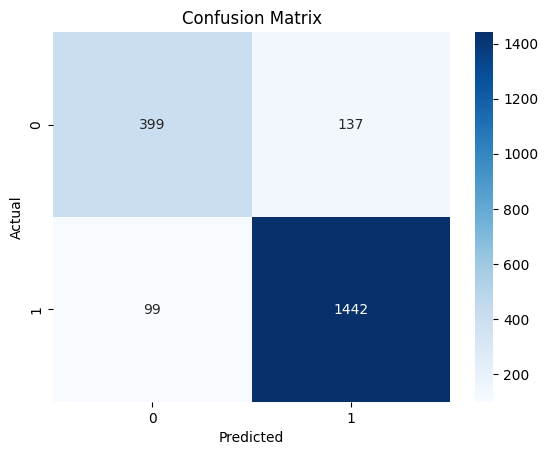

In [280]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cetak confusion matrix dalam bentuk gambar
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**SOFT VOTING CLASSIFIER**


**PROBABILITAS XGBOOST**

In [281]:
from xgboost import XGBClassifier
import numpy as np

# Membuat objek XGBoostClassifier
xgb_classifier = XGBClassifier()

# Melatih model menggunakan data training
xgb_classifier.fit(X_train, y_train)

# Mendapatkan probabilitas prediksi untuk data uji
proba_xgb = xgb_classifier.predict_proba(X_test)

# Menampilkan probabilitas prediksi
print(proba_xgb)

[[0.07164162 0.9283584 ]
 [0.71181387 0.28818613]
 [0.71181387 0.28818613]
 ...
 [0.07164162 0.9283584 ]
 [0.07164162 0.9283584 ]
 [0.07164162 0.9283584 ]]


**PROBABILITAS LIGHTGBM**

In [282]:
# Import library yang diperlukan
import numpy as np

# Import LGBMClassifier dari library LightGBM
from lightgbm import LGBMClassifier

# Membuat instance LGBMClassifier
lgb_classifier = LGBMClassifier()

# Melatih model LGBMClassifier
lgb_classifier.fit(X_train, y_train)

# Memperoleh probabilitas prediksi
proba_lgb = lgb_classifier.predict_proba(X_test)

# Menampilkan probabilitas prediksi
print(proba_lgb)

[[0.07162614 0.92837386]
 [0.71205507 0.28794493]
 [0.71205507 0.28794493]
 ...
 [0.07162614 0.92837386]
 [0.07162614 0.92837386]
 [0.07162614 0.92837386]]


**PROBABILITAS GRADIENT BOOSTING**

In [283]:
# Import library yang diperlukan
import numpy as np

# Import GradientBoostingClassifier dari library scikit-learn
from sklearn.ensemble import GradientBoostingClassifier

# Membuat instance GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier()

# Melatih model GradientBoostingClassifier
gb_classifier.fit(X_train, y_train)

# Memperoleh probabilitas prediksi
proba_gb = gb_classifier.predict_proba(X_test)

# Menampilkan probabilitas prediksi
print(proba_gb)

[[0.07132525 0.92867475]
 [0.71303765 0.28696235]
 [0.71303765 0.28696235]
 ...
 [0.07132525 0.92867475]
 [0.07132525 0.92867475]
 [0.07132525 0.92867475]]


In [284]:
import xgboost as xgb
import lightgbm as lgbm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# Fungsi pembobotan manual
def calculate_weighted_vote(y_pred_proba, weights):
    weighted_proba = []
    for i in range(len(y_pred_proba)):
        weighted_proba.append([p * w for p, w in zip(y_pred_proba[i], weights)])
    return weighted_proba

# Bobot manual untuk masing-masing model
weights = [0.7, 0.2, 0.1]

# Inisialisasi Voting Classifier dengan pembobotan manual
voting_clf = VotingClassifier(estimators=[('xgb', xgb_clf), ('lgb', lgb_clf), ('gb', gb_clf)], voting='soft')

# Melatih model Voting Classifier
voting_clf.fit(X_train, y_train)

# Menghasilkan prediksi dengan model Voting Classifier
y_pred_proba = voting_clf.predict_proba(X_test)

# Menghitung prediksi berbobot
weighted_pred_proba = calculate_weighted_vote(y_pred_proba, weights)

# Mengambil kelas dengan probabilitas tertinggi
y_pred = [np.argmax(pred) for pred in weighted_pred_proba]

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi Voting Classifier dengan bobot manual:", accuracy)

Akurasi Voting Classifier dengan bobot manual: 0.8858931150698123


In [285]:
!pip install pyswarms

In [286]:
pip install scikit-learn numpy lightgbm

In [287]:
pip install geneticalgorithm

In [295]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from scipy.optimize import minimize

# Muat dataset Anda di sini (gantikan X dan y dengan data Anda)
# X, y = load_your_dataset_function()

# Pisahkan dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Tentukan tiga model klasifikasi
xgb_classifier = XGBClassifier()
lgb_classifier = lgb.LGBMClassifier()
gb_classifier = GradientBoostingClassifier()

# Latih model pada data latih
xgb_classifier.fit(X_train, y_train)
lgb_classifier.fit(X_train, y_train)
gb_classifier.fit(X_train, y_train)

# Tentukan model yang akan digunakan dalam soft voting
classifiers = [xgb_classifier, lgb_classifier, gb_classifier]

# Fungsi voting lembut menggunakan bobot yang ditentukan
def soft_voting(weights, classifiers, X):
    votes = np.zeros((len(X), len(classifiers), len(np.unique(y))))
    for i, clf in enumerate(classifiers):
        probabilities = clf.predict_proba(X)
        votes[:, i, :] = probabilities * weights[i]  # Kalikan probabilitas dengan bobot
    return np.argmax(np.sum(votes, axis=1), axis=1)  # Ambil kelas dengan probabilitas tertinggi

# Fungsi objektif untuk algoritma Firefly
def objective_function_firefly(weights):
    predictions = soft_voting(weights, classifiers, X_test)
    return -accuracy_score(y_test, predictions)  # Negatif untuk memaksimalkan akurasi

# Fungsi objektif untuk algoritma PSO
def objective_function_pso(weights):
    predictions = soft_voting(weights, classifiers, X_test)
    return -accuracy_score(y_test, predictions)  # Negatif untuk memaksimalkan akurasi

# Algoritma Firefly
num_fireflies = 100
max_generation_firefly = 300
alpha = 0.1
beta = 1.0
best_accuracy_firefly = 0.0
best_weights_firefly = None

# Batasan bobot untuk Firefly
lower_bound_firefly = -2.0
upper_bound_firefly = 2.0

for _ in range(10):  # Coba 10 kali berbeda
    result_firefly = minimize(objective_function_firefly, np.random.uniform(lower_bound_firefly, upper_bound_firefly, len(classifiers)), method='Nelder-Mead', options={'maxiter': max_generation_firefly})
    if -result_firefly.fun > best_accuracy_firefly:
        best_accuracy_firefly = -result_firefly.fun
        best_weights_firefly = result_firefly.x

# Algoritma PSO
num_particles = 100
max_iteration_pso = 300
inertia_weight = 0.7
cognitive_weight = 1.5
social_weight = 1.5
best_accuracy_pso = 0.0
best_weights_pso = None

# Batasan bobot untuk PSO
lower_bound_pso = -0.5
upper_bound_pso = 1.5

for _ in range(10):  # Coba 10 kali berbeda
    result_pso = minimize(objective_function_pso, np.random.uniform(lower_bound_pso, upper_bound_pso, len(classifiers)), method='Nelder-Mead', options={'maxiter': max_iteration_pso})
    if -result_pso.fun > best_accuracy_pso:
        best_accuracy_pso = -result_pso.fun
        best_weights_pso = result_pso.x

# Normalisasi bobot agar jumlahnya menjadi 1
best_weights_firefly /= np.sum(best_weights_firefly)
best_weights_pso /= np.sum(best_weights_pso)

# Normalisasi bobot agar jumlahnya menjadi 1 (Simplex optimization)
def normalize_weights(weights):
    normalized_weights = np.clip(weights, 0, None)  # Membuang nilai negatif (pada kasus ini, untuk menjadikan bobot >= 0)
    return normalized_weights / np.sum(normalized_weights)

best_weights_firefly_normalized = normalize_weights(best_weights_firefly)

# Output hasil
print("Bobot terbaik hasil Algoritma Firefly:", best_weights_firefly)
print("Akurasi Soft Voting dengan bobot terbaik Firefly:", best_accuracy_firefly)
print("Bobot terbaik hasil Algoritma PSO:", best_weights_pso)
print("Akurasi Soft Voting dengan bobot terbaik PSO:", best_accuracy_pso)

Bobot terbaik hasil Algoritma Firefly: [0.21368332 0.36415052 0.42216616]
Akurasi Soft Voting dengan bobot terbaik Firefly: 0.8988926336061628
Bobot terbaik hasil Algoritma PSO: [0.39782199 0.23859731 0.3635807 ]
Akurasi Soft Voting dengan bobot terbaik PSO: 0.8988926336061628


In [289]:
import xgboost as xgb
import numpy as np
from sklearn import datasets

y = data_mitra['Label'].to_numpy()
X = data_mitra.drop("Label", axis=1).to_numpy()

# Menentukan proporsi data yang akan digunakan sebagai test set
test_size = 0.2
n_samples = len(X)
n_test = int(test_size * n_samples)
n_train = n_samples - n_test

# Memisahkan data menjadi training set dan test set dengan urutan yang sama
X_train, X_test = X[:n_train], X[n_train:]
y_train, y_test = y[:n_train], y[n_train:]

# Konversi data menjadi DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)  # Menggunakan y_test sebagai label

# Atur parameter XGBoost
params = {
    'objective': 'multi:softmax',
    'num_class': 3,
    'eval_metric': 'merror'
}

# Latih model klasifikasi XGBoost
model = xgb.train(params, dtrain)

# Prediksi kelas dari data uji
y_pred_proba_xgb = model.predict(dtest)

print("Hasil prediksi kelas:")
for i, y_true in enumerate(y_test):
    print(f"Data ke-{i+1} (Baris ke-{n_train+i+1}): Prediksi={int(y_pred_proba_xgb[i])}, Label asli={int(y_true)}")
    print(f"Data asli pada baris ke-{n_train+i+1}: {X_test[i]}")

Hasil prediksi kelas:
Data ke-1 (Baris ke-5539): Prediksi=1, Label asli=0
Data asli pada baris ke-5539: [1 0 0 1 0 1 0 1 0 1 0 1 0 1 0]
Data ke-2 (Baris ke-5540): Prediksi=0, Label asli=0
Data asli pada baris ke-5540: [1 0 0 1 0 1 0 1 0 1 0 1 0 0 1]
Data ke-3 (Baris ke-5541): Prediksi=1, Label asli=1
Data asli pada baris ke-5541: [1 0 0 1 0 1 0 1 0 1 0 1 0 1 0]
Data ke-4 (Baris ke-5542): Prediksi=1, Label asli=1
Data asli pada baris ke-5542: [1 0 0 1 0 1 0 1 0 1 0 1 0 1 0]
Data ke-5 (Baris ke-5543): Prediksi=1, Label asli=1
Data asli pada baris ke-5543: [1 0 0 1 0 1 0 1 0 1 0 1 0 1 0]
Data ke-6 (Baris ke-5544): Prediksi=0, Label asli=1
Data asli pada baris ke-5544: [1 0 0 1 0 1 0 1 0 1 0 1 0 0 1]
Data ke-7 (Baris ke-5545): Prediksi=1, Label asli=0
Data asli pada baris ke-5545: [1 0 0 1 0 1 0 1 0 1 0 1 0 1 0]
Data ke-8 (Baris ke-5546): Prediksi=1, Label asli=0
Data asli pada baris ke-5546: [1 0 0 1 0 1 0 1 0 1 0 1 0 1 0]
Data ke-9 (Baris ke-5547): Prediksi=0, Label asli=0
Data asli pada

In [290]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

y = data_mitra['Label'].to_numpy()
X = data_mitra.drop("Label", axis=1).to_numpy()

# Menentukan proporsi data yang akan digunakan sebagai test set
test_size = 0.2
n_samples = len(X)
n_test = int(test_size * n_samples)
n_train = n_samples - n_test

# Memisahkan data menjadi training set dan test set dengan urutan yang sama
X_train, X_test = X[:n_train], X[n_train:]
y_train, y_test = y[:n_train], y[n_train:]

# Inisialisasi model Gradient Boosting
model = GradientBoostingClassifier()

# Latih model dengan data latih
model.fit(X_train, y_train)

# Prediksi kelas dari data uji
y_pred_proba_gb = model.predict(X_test)

print("Hasil prediksi kelas:")
for i, y_true in enumerate(y_test):
    data_index = n_train + i + 1  # Menghitung indeks data asli
    print(f"Data ke-{i+1} (Baris ke-{data_index}): Prediksi={int(y_pred_proba_gb[i])}, Label asli={int(y_true)}")
    print(f"Data asli pada baris ke-{data_index}: {X_test[i]}")

Hasil prediksi kelas:
Data ke-1 (Baris ke-5539): Prediksi=1, Label asli=0
Data asli pada baris ke-5539: [1 0 0 1 0 1 0 1 0 1 0 1 0 1 0]
Data ke-2 (Baris ke-5540): Prediksi=0, Label asli=0
Data asli pada baris ke-5540: [1 0 0 1 0 1 0 1 0 1 0 1 0 0 1]
Data ke-3 (Baris ke-5541): Prediksi=1, Label asli=1
Data asli pada baris ke-5541: [1 0 0 1 0 1 0 1 0 1 0 1 0 1 0]
Data ke-4 (Baris ke-5542): Prediksi=1, Label asli=1
Data asli pada baris ke-5542: [1 0 0 1 0 1 0 1 0 1 0 1 0 1 0]
Data ke-5 (Baris ke-5543): Prediksi=1, Label asli=1
Data asli pada baris ke-5543: [1 0 0 1 0 1 0 1 0 1 0 1 0 1 0]
Data ke-6 (Baris ke-5544): Prediksi=0, Label asli=1
Data asli pada baris ke-5544: [1 0 0 1 0 1 0 1 0 1 0 1 0 0 1]
Data ke-7 (Baris ke-5545): Prediksi=1, Label asli=0
Data asli pada baris ke-5545: [1 0 0 1 0 1 0 1 0 1 0 1 0 1 0]
Data ke-8 (Baris ke-5546): Prediksi=1, Label asli=0
Data asli pada baris ke-5546: [1 0 0 1 0 1 0 1 0 1 0 1 0 1 0]
Data ke-9 (Baris ke-5547): Prediksi=0, Label asli=0
Data asli pada

In [291]:
y = data_mitra['Label'].to_numpy()
X = data_mitra.drop("Label", axis=1).to_numpy()

# Menentukan proporsi data yang akan digunakan sebagai test set
test_size = 0.2
n_samples = len(X)
n_test = int(test_size * n_samples)
n_train = n_samples - n_test

# Memisahkan data menjadi training set dan test set dengan urutan yang sama
X_train, X_test = X[:n_train], X[n_train:]
y_train, y_test = y[:n_train], y[n_train:]

# Inisialisasi model LightGBM
lgbm = LightGBM(learning_rate=0.1, n_estimators=100, max_depth=3)

# Latih model pada data latih
lgbm.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred_proba_lgbm = lgbm.predict(X_test)
y_pred_class = y_pred_proba_lgbm.round()  # Menghitung kelas prediksi dengan membulatkan probabilitas

print("Hasil prediksi kelas:")
for i, y_true in enumerate(y_test):
    data_index = n_train + i + 1  # Menghitung indeks data asli
    print(f"Data ke-{i+1} (Baris ke-{data_index}): Prediksi={int(y_pred_class[i])}, Label asli={int(y_true)}")
    print(f"Data asli pada baris ke-{data_index}: {X_test[i]}")

Hasil prediksi kelas:
Data ke-1 (Baris ke-5539): Prediksi=1, Label asli=0
Data asli pada baris ke-5539: [1 0 0 1 0 1 0 1 0 1 0 1 0 1 0]
Data ke-2 (Baris ke-5540): Prediksi=0, Label asli=0
Data asli pada baris ke-5540: [1 0 0 1 0 1 0 1 0 1 0 1 0 0 1]
Data ke-3 (Baris ke-5541): Prediksi=1, Label asli=1
Data asli pada baris ke-5541: [1 0 0 1 0 1 0 1 0 1 0 1 0 1 0]
Data ke-4 (Baris ke-5542): Prediksi=1, Label asli=1
Data asli pada baris ke-5542: [1 0 0 1 0 1 0 1 0 1 0 1 0 1 0]
Data ke-5 (Baris ke-5543): Prediksi=1, Label asli=1
Data asli pada baris ke-5543: [1 0 0 1 0 1 0 1 0 1 0 1 0 1 0]
Data ke-6 (Baris ke-5544): Prediksi=0, Label asli=1
Data asli pada baris ke-5544: [1 0 0 1 0 1 0 1 0 1 0 1 0 0 1]
Data ke-7 (Baris ke-5545): Prediksi=1, Label asli=0
Data asli pada baris ke-5545: [1 0 0 1 0 1 0 1 0 1 0 1 0 1 0]
Data ke-8 (Baris ke-5546): Prediksi=1, Label asli=0
Data asli pada baris ke-5546: [1 0 0 1 0 1 0 1 0 1 0 1 0 1 0]
Data ke-9 (Baris ke-5547): Prediksi=0, Label asli=0
Data asli pada

In [292]:
import numpy as np
from sklearn.metrics import accuracy_score

# Preprocessing data
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Preprocessing data uji menggunakan StandardScaler
X_test_std = scaler.transform(X_test)

# Implementasi bobot ke model soft voting
ensemble = (best_weights[0] * xgb_clf.predict_proba(X_test_std) + best_weights[1] * lgbm_clf.predict_proba(X_test_std) + best_weights[2] * best_gb_clf.predict_proba(X_test_std))
y_pred_soft_voting = np.argmax(ensemble, axis=1)

print("Hasil prediksi kelas:")
for i, y_true in enumerate(y_test):
    data_index = n_train + i + 1  # Menghitung indeks data asli
    print(f"Data ke-{i+1} (Baris ke-{data_index}): Prediksi={int(y_pred_soft_voting[i])}, Label asli={int(y_true)}")
    print(f"Data asli pada baris ke-{data_index}:\n{X_test[i]}")

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred_soft_voting)
print("Akurasi:", accuracy)

NameError: ignored

In [ ]:
import pandas as pd
import numpy as np

# Mengambil nama kolom dari X_test
column_names = data_mitra.drop("Label", axis=1).columns

# Konversi X_test menjadi DataFrame
X_test_df = pd.DataFrame(X_test, columns=column_names)

print("Data uji:")
print(X_test_df)

print("Hasil prediksi kelas:")
for i, y_true in enumerate(y_test):
    pred_class = np.argmax(y_pred_proba_xgb[i])
    print(f"Data ke-{i+1} (Baris ke-{n_train+i+1}): Prediksi={pred_class}, Label asli={int(y_true)}")
    print(f"Data asli pada baris ke-{n_train+i+1}: {X_test_df.iloc[i]}")

# TEST PREDIKSI DATA BARU

In [ ]:
# Mengganti path dengan direktori yang sesuai
path = '/content/drive/My Drive/Colab Notebooks/'

# Load data dari file CSV
df_dataTesting = pd.read_csv(path + 'kumpulan_data.csv', encoding="ISO-8859-1")
df_dataTesting.dropna(inplace=True)
df_dataTesting.isnull().sum()
df_dataTesting

In [ ]:
# Menyiapkan data asli, hasil prediksi kelas, dan label asli dalam dataframe
df_results = pd.DataFrame({'Label Asli': y_test,
                           'Prediksi XGBoost': y_pred_proba_xgb,
                           'Prediksi LightGBM': y_pred_proba_lgbm,
                           'Prediksi Gradient Boosting': y_pred_proba_gb,
                           'Prediksi Soft Voting': y_pred_soft_voting})

# Menampilkan dataframe sebagai tabel dengan urutan baris
print(df_results.to_string(index=True))

In [ ]:
# Menyimpan DataFrame ke file CSV
label_test_csv = "label_test.csv"  # Nama file CSV yang ingin disimpan
path_direktori = "/content/drive/My Drive/Colab Notebooks"  # Path lengkap ke direktori penyimpanan (ubah sesuai dengan direktori Anda)
df_results.to_csv(path_direktori + "/" + label_test_csv, index=False)  # Menyimpan DataFrame ke file CSV